In [16]:
from sympy import *
from syscirc.funcs import u, equivalent_test
from syscirc.plot import plotcont
from syscirc.convolution import convolution_s
a, b = symbols("a b")

In [17]:
def x(t:float):
    return exp(-a*t)*u(t)

#plotcont(x, [-1,5], 0.01, a=1)

In [18]:
def h(t:float):
    return exp(-b*t)*u(t)

#plotcont(h, [-1,5], 0.01, b=1)

In [19]:
y = convolution_s(x, h)
y.simplify()

Piecewise(((exp(a*Max(0, t)) - exp(b*Max(0, t)))*exp(-a*Max(0, t) - b*t)/(a - b), Ne(a, b)), (exp(-b*t)*Max(0, t), True))

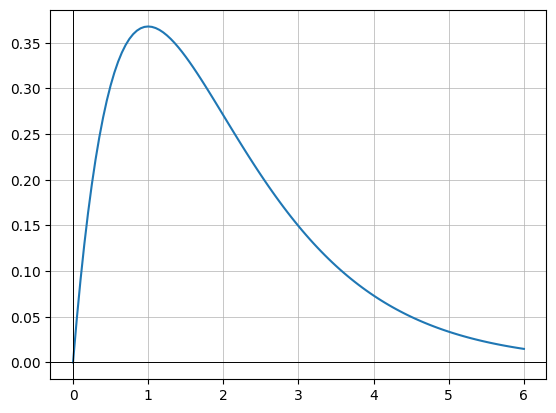

In [20]:
plotcont(y, [0, 6], 0.05, a=1, b=1)

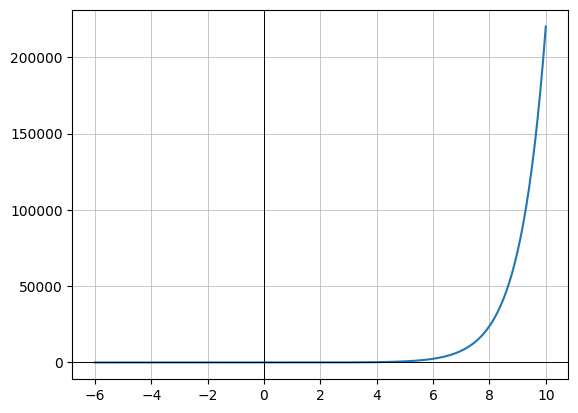

In [21]:
plotcont(y, [-6, 10], 0.05, a=-1, b=-1)

In [22]:
t = Symbol("t")
ym = Piecewise(((exp(-a*t)-exp(-b*t))/(b-a)*u(t), Ne(a,b)), ((t*exp(-b*t))*u(t), Eq(a,b)))
ym.simplify()

Piecewise((Piecewise(((exp(a*t) - exp(b*t))*exp(-t*(a + b))/(a - b), t >= 0), (0, True)), Ne(a, b)), (Piecewise((t*exp(-b*t), t >= 0), (0, True)), True))

In [23]:
equivalent_test(y, ym, a=1, b=1)

True

In [24]:
solutions = solve(Eq(y.diff(t), 0), t)

In [25]:
solutions[1]

Piecewise((-log(b/a)/(a - b), Ne(a, b)), (nan, True))

In [26]:
solutions[0]

Piecewise((1/b, Eq(a, b)), (nan, True))

In [27]:
sol_general = Piecewise((solutions[1], Ne(a,b)), (solutions[0], Eq(a,b)))
sol_general

Piecewise((-log(b/a)/(a - b), Ne(a, b)), (1/b, True))

In [28]:
y_sol = y.subs(t, sol_general)
y_sol.simplify()

Piecewise(((exp(a*Max(0, -log(b/a)/(a - b))) - exp(b*Max(0, -log(b/a)/(a - b))))*exp(-a*Max(0, -log(b/a)/(a - b)) + b*log(b/a)/(a - b))/(a - b), Ne(a, b)), (Piecewise((exp(b*log(b/a)/(a - b))*Max(0, -log(b/a)/(a - b)), Ne(a, b)), (exp(-1)*Max(0, 1/b), True)), True))